# RatingProduct & SortingReviewsin Amazon

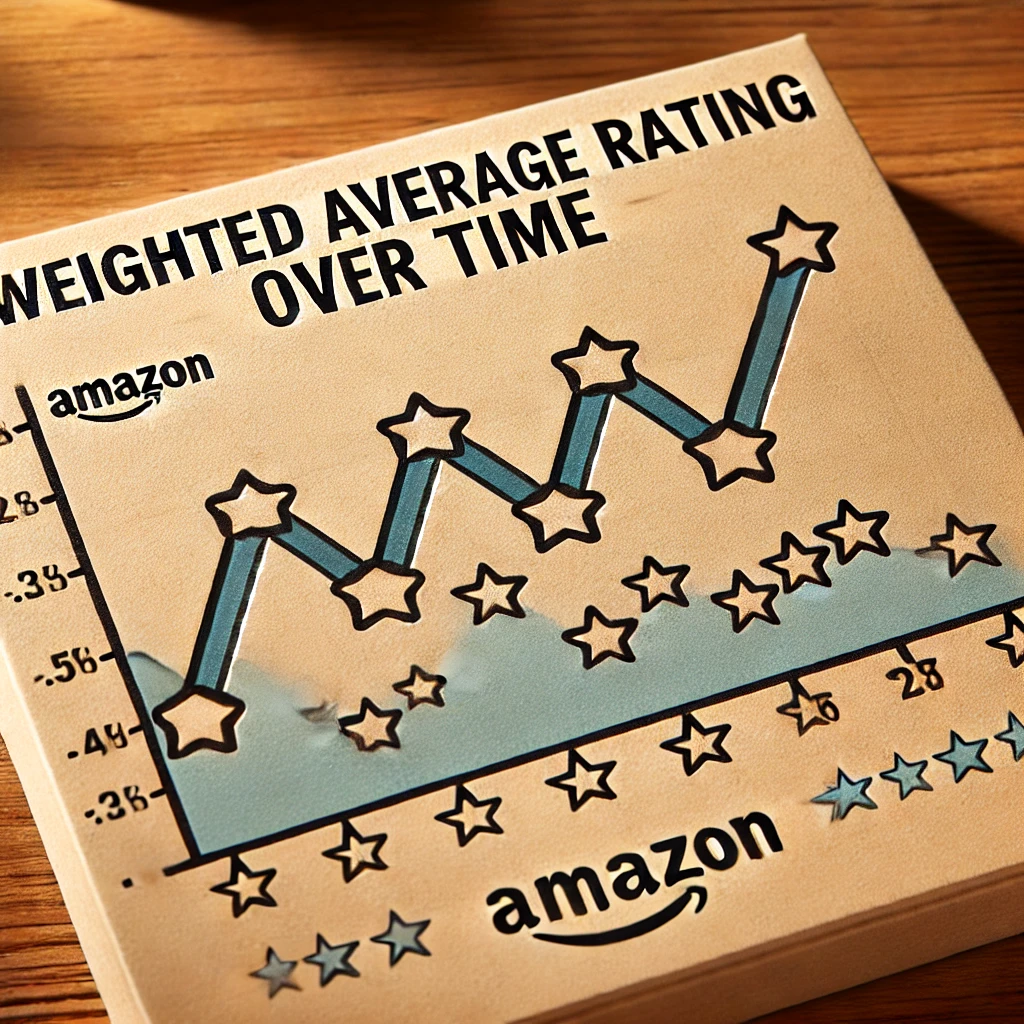

# #Business Problem 

One important problem in e-commerce is the correct calculation of product ratings after sales. Solving this problem will provide more customer satisfaction on the e-commerce site, help sellers' products stand out, and ensure a smooth shopping experience for buyers. Another problem is the proper ranking of product reviews. Misleading reviews can directly affect a product's sales, causing both product loss and customer dissatisfaction. Solving these two main problems will help e-commerce sites and sellers increase their sales while allowing customers to complete their shopping journey smoothly.

# #**Dataset Story** 

This dataset contains product data from Amazon, including product categories and various metadata. It includes user ratings and reviews for the product with the most reviews in the Electronics category.

Variables:

-reviewerID: User ID

-asin: Product ID

-reviewerName: User Name

-helpful: Helpful review rating

-reviewText: Review text

-overall: Product rating

-summary: Review summary

-unixReviewTime: Review time (Unix format)

-reviewTime: Raw review time

-day_diff: Number of days since the review

-helpful_yes: Number of helpful votes for the review

-total_vote: Total votes for the review

In the shared dataset, users have given ratings and written reviews for a product. The goal of this task is to evaluate the ratings by weighting them according to the date. The weighted rating should be compared with the initial average rating.

Step 1: Calculate the average rating of the product.

Step 2: Calculate the weighted average rating based on the date.

Step 3: Compare the average rating of each time period in the weighted rating.

Task 1: Calculate the AverageRating based on current reviews and compare it with the existing AverageRating.

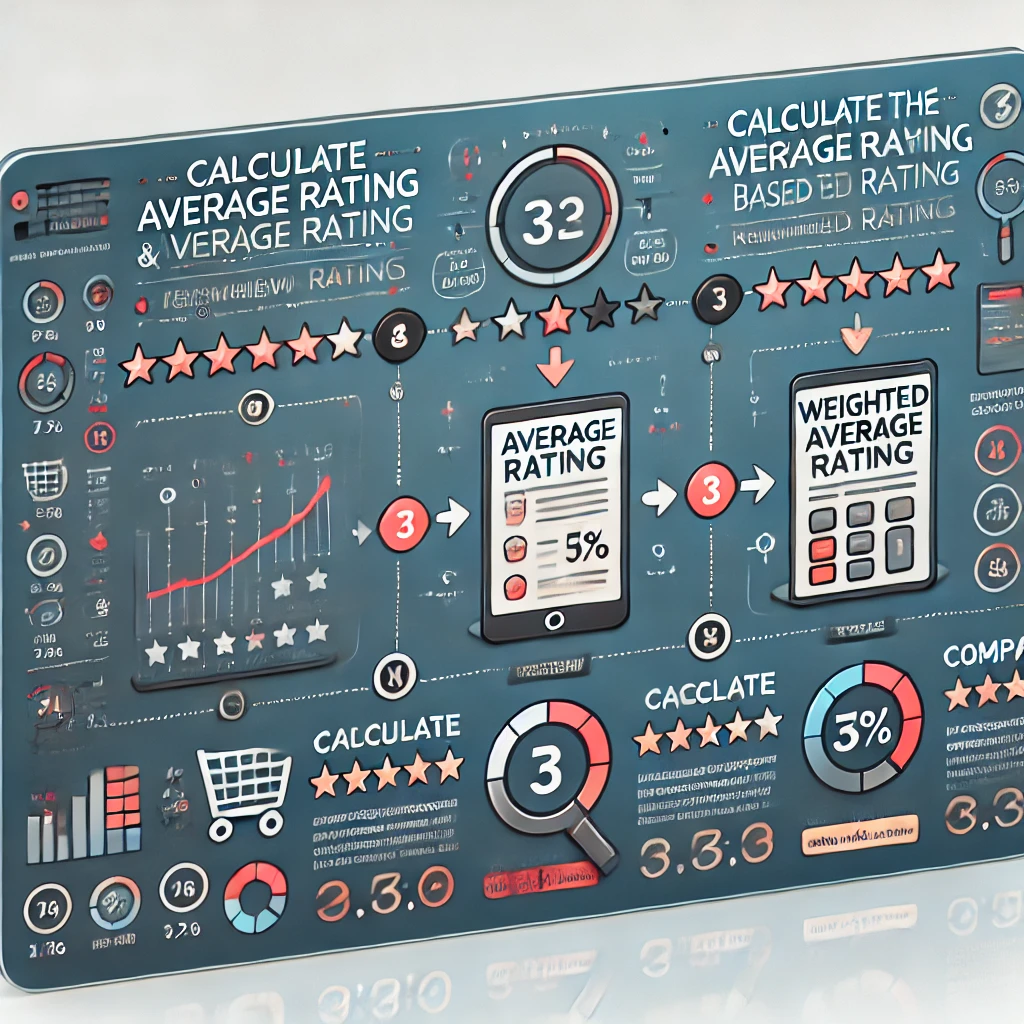

In [1]:
import pandas as pd
import math
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv("/kaggle/input/rating-product-and-sorting-reviews-in-amazon/amazon_review.csv")

In [3]:
df.head ()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
df.shape

(4915, 12)

**Step 1: Calculate the average rating of the product.**

In [5]:
df["overall"].mean ()

4.587589013224822

**Step 2: Calculate the weighted average rating based on the date.**

**Time-Based Weighted Average**

In [6]:
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object

In [7]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [8]:
df.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
day_diff                   int64
helpful_yes                int64
total_vote                 int64
dtype: object

If the data type of the date column is not datetime64, you should first convert it using

In [9]:
max_date = df['reviewTime'].max()  # 2014-12-07 00:00:00
current_date = pd.to_datetime ("2014-12-08")
df["days"] = (current_date - df['reviewTime']).dt.days

In [10]:
df.describe().T.loc["days"]

count   4915.00000
mean     437.36704
min        1.00000
25%      281.00000
50%      431.00000
75%      601.00000
max     1064.00000
std      209.43987
Name: days, dtype: object

Determining intervals: Interval Width = max - min / 4 = 266

I have defined the intervals as 1-267, 268-533, 534-799, 800-1064. To divide this range into 4 equal parts, we can do quartile-based binning (divide into four)

In [11]:
df.loc[df["days"] <= 267, "overall"].mean() * 30/100 + \
    df.loc[(df["days"] > 267) & (df["days"] <= 533), "overall"].mean() * 25/100 + \
    df.loc[(df["days"] > 533) & (df["days"] <= 799), "overall"].mean() * 23/100 + \
    df.loc[(df["days"] > 799), "overall"].mean() * 22/100

4.557103089234783

To turn this code into a function, you can do something like this

In [12]:
def time_based_weighted_average(dataframe, w1=30, w2=25, w3=23, w4=22):
    return dataframe.loc[df["days"] <= 267, "overall"].mean() * w1 / 100 + \
           dataframe.loc[(dataframe["days"] > 267) & (dataframe["days"] <= 533), "overall"].mean() * w2 / 100 + \
           dataframe.loc[(dataframe["days"] > 533) & (dataframe["days"] <= 799), "overall"].mean() * w3 / 100 + \
           dataframe.loc[(dataframe["days"] > 799), "overall"].mean() * w4 / 100

time_based_weighted_average(df)

time_based_weighted_average(df, 30, 25, 23, 22)

4.557103089234783

Simple average treats all reviews equally and does not consider the effect of time.

Time-weighted average gives more importance to recent data, so it usually reflects more up-to-date user experiences.

Since the time-weighted average tends to be lower, recent ratings may be a bit lower compared to the overall average.

If high ratings are in the past and lower ratings are recent, the time-weighted average better shows the downward trend.

If customer satisfaction or product quality changes over time, using this method provides a more realistic analysis.

In [13]:
df.loc[df["days"] <= 267, "overall"].mean()

4.684622067767159

In [14]:
df.loc[(df["days"] > 267) & (df["days"] <= 533), "overall"].mean()

4.625484496124031

In [15]:
df.loc[(df["days"] > 533) & (df["days"] <= 799), "overall"].mean()

4.486310299869622

In [16]:
df.loc[(df["days"] > 799), "overall"].mean()

4.379518072289157

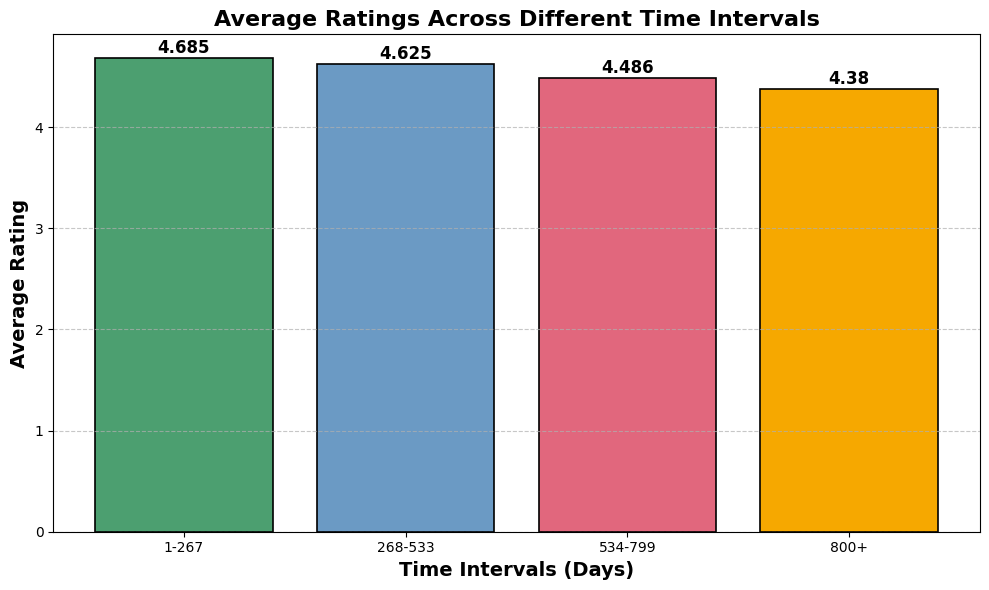

In [17]:
import matplotlib.pyplot as plt

# Calculate mean values for each interval
mean_values = [
    df.loc[df["days"] <= 267, "overall"].mean(),
    df.loc[(df["days"] > 267) & (df["days"] <= 533), "overall"].mean(),
    df.loc[(df["days"] > 533) & (df["days"] <= 799), "overall"].mean(),
    df.loc[(df["days"] > 799), "overall"].mean()
]

# Define the labels for the intervals
intervals = ["1-267", "268-533", "534-799", "800+"]

# Define different colors for each bar
colors = ['#4C9F70', '#6B9AC4', '#E1677D', '#F6A800']

# Create a more refined plot
plt.figure(figsize=(10, 6))

# Create the bar chart with enhanced style
bars = plt.bar(intervals, mean_values, color=colors, edgecolor='black', linewidth=1.2)

# Add title with a professional font
plt.title('Average Ratings Across Different Time Intervals', fontsize=16, fontweight='bold', family='Arial')

# Add labels for x and y axes with better fonts
plt.xlabel('Time Intervals (Days)', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold', family='Arial')

# Display grid lines to enhance readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the average values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


**User-Based Weighted Average**

In [18]:
df.describe().T.loc["total_vote"] 

count   4915.00000
mean       1.52146
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     2020.00000
std       44.12309
Name: total_vote, dtype: object

Min = 0, Max = 2020, 
Interval width = (2020 - 0) / 4 = 505
0 - 505, 
505 - 1010, 
1010 - 1515, 
1515 - 2020

In [19]:
def user_based_weighted_average(dataframe, w1=22, w2=24, w3=26, w4=30):
    avg1 = dataframe.loc[dataframe["total_vote"] <= 505, "overall"].mean()
    avg2 = dataframe.loc[(dataframe["total_vote"] > 505) & (dataframe["total_vote"] <= 1010), "overall"].mean()
    avg3 = dataframe.loc[(dataframe["total_vote"] > 1010) & (dataframe["total_vote"] <= 1515), "overall"].mean()
    avg4 = dataframe.loc[(dataframe["total_vote"] > 1515), "overall"].mean()

    # NaN olanları 0 yap
    avg1 = avg1 if pd.notna(avg1) else 0
    avg2 = avg2 if pd.notna(avg2) else 0
    avg3 = avg3 if pd.notna(avg3) else 0
    avg4 = avg4 if pd.notna(avg4) else 0

    return avg1 * w1 / 100 + avg2 * w2 / 100 + avg3 * w3 / 100 + avg4 * w4 / 100

user_based_weighted_average(df, 22, 24, 26, 30)


3.2093933224755697

**Weighted Rating**

In [20]:
def course_weighted_rating(dataframe, time_w=50, user_w=50):
    return time_based_weighted_average(dataframe) * time_w/100 + user_based_weighted_average(dataframe)*user_w/100

course_weighted_rating(df)
course_weighted_rating(df, time_w=50, user_w=50)

3.8832482058551765

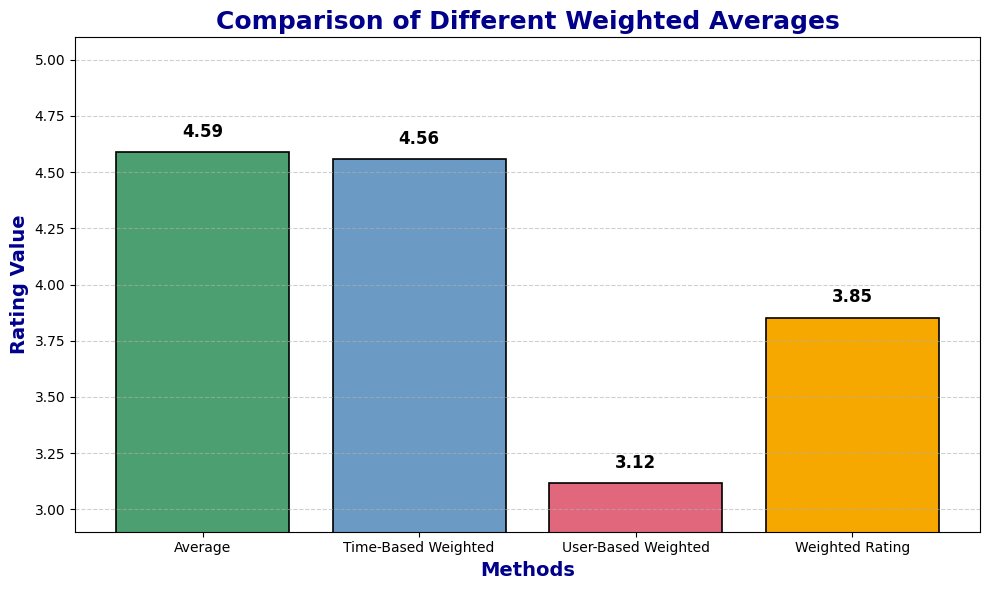

In [21]:
import matplotlib.pyplot as plt

# Data containing the results
labels = ["Average", "Time-Based Weighted", "User-Based Weighted", "Weighted Rating"]
values = [4.5876, 4.5571, 3.1176, 3.8532]

# Color palette to make it visually distinct
colors = ['#4C9F70', '#6B9AC4', '#E1677D', '#F6A800']

# Create a more polished plot with a larger figure size and more defined visual style
plt.figure(figsize=(10, 6))

# Create the bar chart with customized edge color and linewidth
bars = plt.bar(labels, values, color=colors, edgecolor='black', linewidth=1.2)

# Add a title with a professional font and better contrast
plt.title("Comparison of Different Weighted Averages", fontsize=18, fontweight='bold', family='Arial', color='darkblue')

# Add axis labels with larger font and clear style
plt.xlabel("Methods", fontsize=14, fontweight='bold', family='Arial', color='darkblue')
plt.ylabel("Rating Value", fontsize=14, fontweight='bold', family='Arial', color='darkblue')

# Set y-axis limit for better visual alignment
plt.ylim(2.9, 5.1)

# Add grid lines for readability and styling
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add the average values on top of the bars with improved font and positioning
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Task 2: Select 20 reviews to be displayed on the product detail page.

Step 1: Create the helpful_no variable.

Step 2: Calculate score_pos_neg_diff, score_average_rating, and wilson_lower_bound scores and add them to the data.

Step 3: Select the 20 reviews and interpret the results.

In [22]:
df['helpful_no'] = df['total_vote'] - df['helpful_yes']

In [23]:
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days,helpful_no
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0,138,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,409,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0,715,0


**score_pos_neg_diff**

In [24]:
#score_pos_neg_diff = (up ratings) − (down ratings)
def score_pos_neg_diff(helpful_yes, helpful_no):
    return helpful_yes - helpful_no

**score_average_rating**

In [25]:
# Score = Average rating = (up ratings) / (all ratings)
def score_average_rating(helpful_yes, helpful_no):
    if helpful_yes + helpful_no == 0:
        return 0
    return helpful_yes / (helpful_yes + helpful_no)

**Wilson Lower Bound Score**

In [26]:
def wilson_lower_bound(up, down, confidence=0.95):
    """
    Wilson Lower Bound Score hesapla

    - Bernoulli parametresi p için hesaplanacak güven aralığının alt sınırı WLB skoru olarak kabul edilir.
    - Hesaplanacak skor ürün sıralaması için kullanılır.
    - Not:
    Eğer skorlar 1-5 arasıdaysa 1-3 negatif, 4-5 pozitif olarak işaretlenir ve bernoulli'ye uygun hale getirilebilir.
    Bu beraberinde bazı problemleri de getirir. Bu sebeple bayesian average rating yapmak gerekir.

    Parameters
    ----------
    up: int
        up count
    down: int
        down count
    confidence: float
        confidence

    Returns
    -------
    wilson score: float

    """
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [27]:
df["score_pos_neg_diff"] = df.apply(lambda x: score_pos_neg_diff(x["helpful_yes"], x["helpful_no"]), axis=1)
df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"], x["helpful_no"]), axis=1)
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)

In [28]:
df.sort_values(by=["wilson_lower_bound"], ascending=False).head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,702,68,1884,0.96634,0.95754
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.00000,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,803,77,1351,0.94884,0.93652
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,579,126,1442,0.92562,0.91214
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.00000,"Warning, read this!",1346544000,2012-02-09,1033,422,495,1033,73,349,0.85253,0.81858
4672,A2DKQQIZ793AV5,B007WTAJTO,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.00000,Super high capacity!!! Excellent price (on Am...,1394150400,2014-07-03,158,45,49,158,4,41,0.91837,0.80811
1835,A1J6VSUM80UAF8,B007WTAJTO,goconfigure,"[60, 68]",Bought from BestBuy online the day it was anno...,5.00000,I own it,1393545600,2014-02-28,283,60,68,283,8,52,0.88235,0.78465
3981,A1K91XXQ6ZEBQR,B007WTAJTO,"R. Sutton, Jr. ""RWSynergy""","[112, 139]",The last few days I have been diligently shopp...,5.00000,"Resolving confusion between ""Mobile Ultra"" and...",1350864000,2012-10-22,777,112,139,777,27,85,0.80576,0.73214
3807,AFGRMORWY2QNX,B007WTAJTO,R. Heisler,"[22, 25]",I bought this card to replace a lost 16 gig in...,3.00000,"Good buy for the money but wait, I had an issue!",1361923200,2013-02-27,649,22,25,649,3,19,0.88000,0.70044
4306,AOHXKM5URSKAB,B007WTAJTO,Stellar Eller,"[51, 65]","While I got this card as a ""deal of the day"" o...",5.00000,Awesome Card!,1339200000,2012-09-06,823,51,65,823,14,37,0.78462,0.67033
4596,A1WTQUOQ4WG9AI,B007WTAJTO,"Tom Henriksen ""Doggy Diner""","[82, 109]",Hi:I ordered two card and they arrived the nex...,1.00000,Designed incompatibility/Don't support SanDisk,1348272000,2012-09-22,807,82,109,807,27,55,0.75229,0.66359


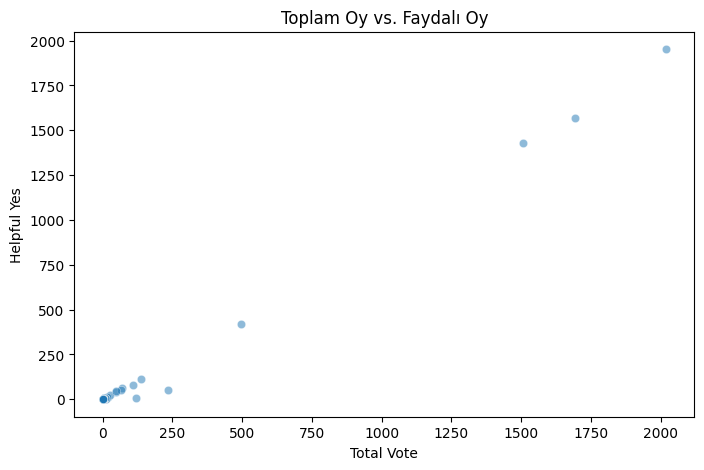

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


#Scatter Plot (Serpilme Grafiği)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["total_vote"], y=df["helpful_yes"], alpha=0.5)
plt.title("Toplam Oy vs. Faydalı Oy")
plt.xlabel("Total Vote")
plt.ylabel("Helpful Yes")
plt.show()

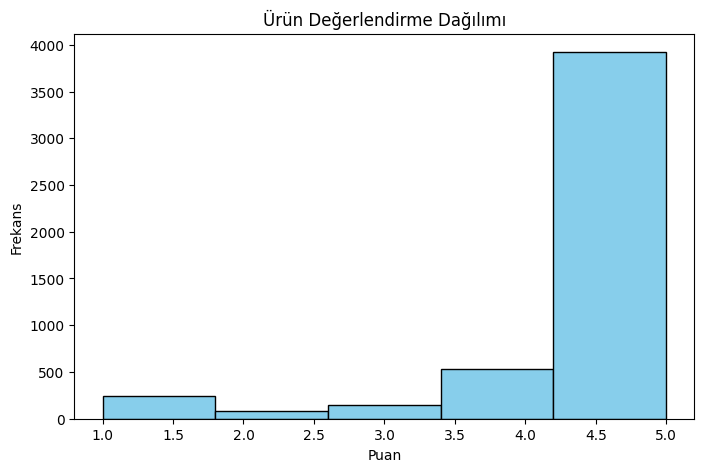

In [30]:
plt.figure(figsize=(8,5))
plt.hist(df["overall"], bins=5, color="skyblue", edgecolor="black")
plt.title("Ürün Değerlendirme Dağılımı")
plt.xlabel("Puan")
plt.ylabel("Frekans")
plt.show()

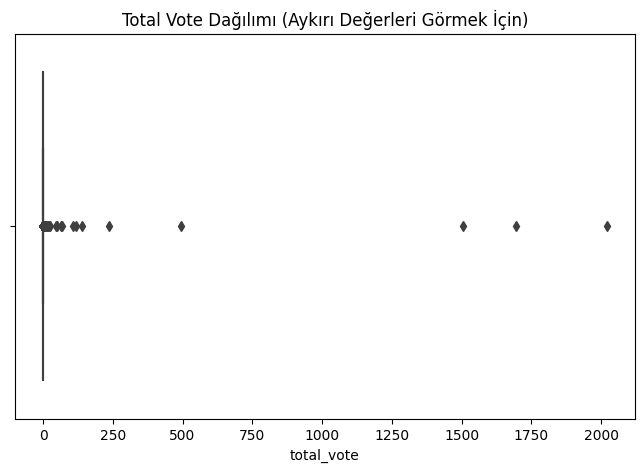

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["total_vote"])
plt.title("Total Vote Dağılımı (Aykırı Değerleri Görmek İçin)")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


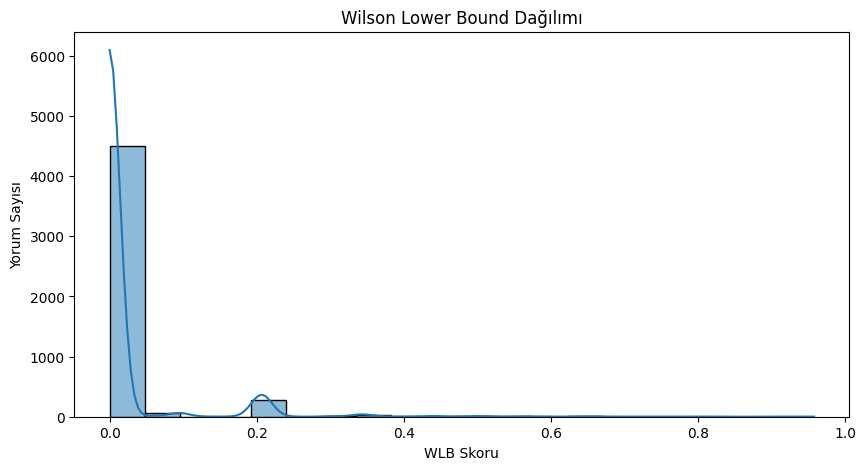

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["wilson_lower_bound"], bins=20, kde=True)
plt.title("Wilson Lower Bound Dağılımı")
plt.xlabel("WLB Skoru")
plt.ylabel("Yorum Sayısı")
plt.show()